# Fitting Rotation Maps with Warps

This Notebook will discuss to include a warp in the fitting of rotation maps.

## Warps

### Parameterization

A warp is implemented as a spatially varying inclination. We have chosen to use the function,

$$z_{\rm warp}(r,\, \phi) = r \times \tan \left[ w_i \cdot \sin(\phi - w_t) \cdot \exp \left( -\frac{1}{2} \frac{r^2}{w_r^2}\right) \right]$$

which describes an inclination which varies radially as a Gaussian. $w_{\phi}$ describes the angle of nodes, that is $z_{\rm warp}(r,\, \phi=w_t) = 0$. In principle any function would be within $\tan [\cdots]$, however we have found this provides sufficient flexibility to describe most cases. $w_t$ is measured from $\phi = 0$ in an eastward direction. Note that other applications, for example in galactic dynamics, use a power-law represention however this diverges at $r = 0$ so we avoid that implementation.

### Shadowing

For high inclination sources, typically $i \gtrsim 50^{\circ}$, extreme warps can shadow regions of the disk. A good first check is to improve the number of iterations to use in the deprojection with

```python
rotationmap.disk_coords_niter = 20
```

where the default is 5. If this doesn't solve it then this isn't a problem, however the typical iterative approach we've used to deproject the coordinates will fail here. If this is likely the case you must use

```python
params['shadowed'] = True
```

which will invoke `_get_shadowed_coords()` rather than `get_flared_coords()`. This forward models the deprojection and interpolates this onto the sky plane which is more computationally expensive. A quick check could be to use `disk_coords()` with and without the `shadowed` argument and looking at the returned contours.

## Application to TW Hya

Doesn't show anything but just an example for now...

In [1]:
# Load up the packages.
%matplotlib inline
from multiprocessing import Pool
from eddy.fit_cube import rotationmap

Assuming uncertainties in ../../cubes/TWHya_CO_cube_dv0.fits


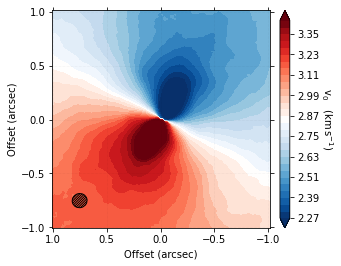

In [2]:
# Load up the data. We are only interested in the inner 1".
cube = rotationmap(path='../../cubes/TWHya_CO_cube_v0.fits',
                   clip=1.0, downsample=2)
cube.plot_data()

In [3]:
# Start with simple flat disk approach.

params = {}
params['x0'] = 0
params['y0'] = 1
params['PA'] = 2
params['mstar'] = 3
params['vlsr'] = 4
p0 = [-6.2e-3, 4.6e-3, 151.0, 0.57, 2.84e3]

# Fix the other parameters.

params['inc'] = 6.8    # degrees 
params['dist'] = 60.1  # parsec

# Run this in parallel.
#with Pool() as pool:
    #_ = cube.fit_map(p0=p0, params=params, nwalkers=128, nburnin=200, nsteps=1000, pool=pool)

Pretty nasty residuals, huh.

Trying with a warp and a flared emission surface just to see what happens. We also set `niter=4` to restart the sampler four times, so we take in total 4 x 600 steps, each time recentering on the median values of the samples from the previous run.

Assuming:
	p0 = [x0, y0, PA, mstar, vlsr, w_i, w_r, w_t].


100%|██████████| 300/300 [01:27<00:00,  3.44it/s]


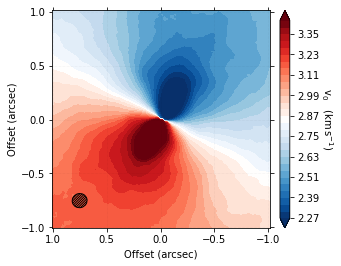

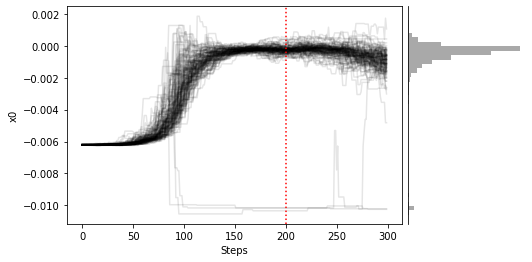

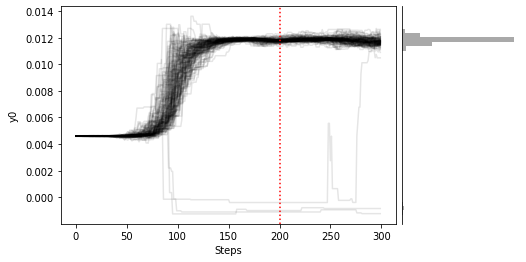

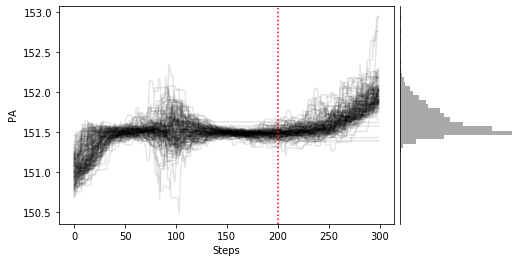

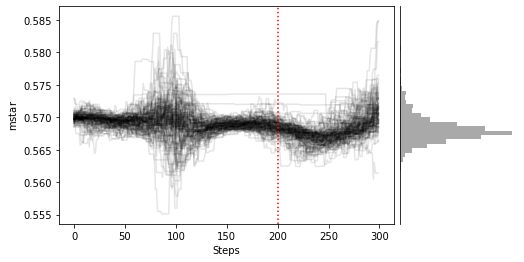

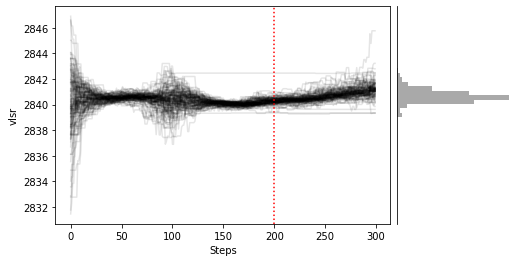

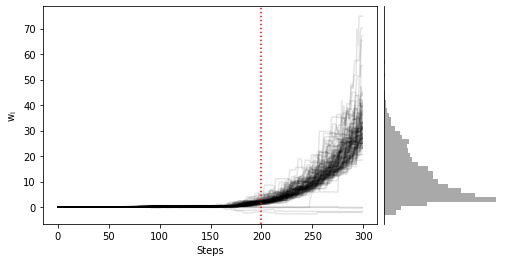

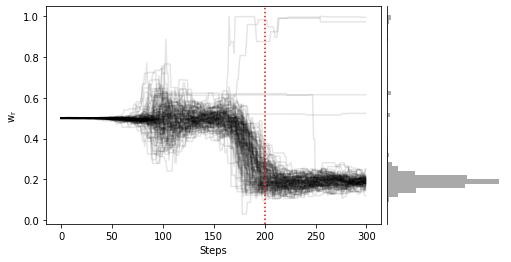

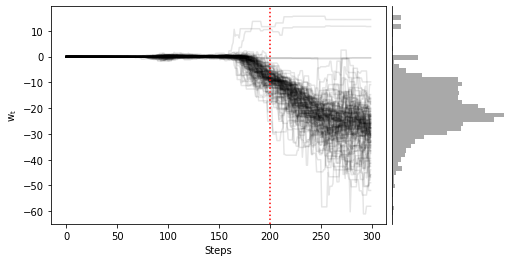

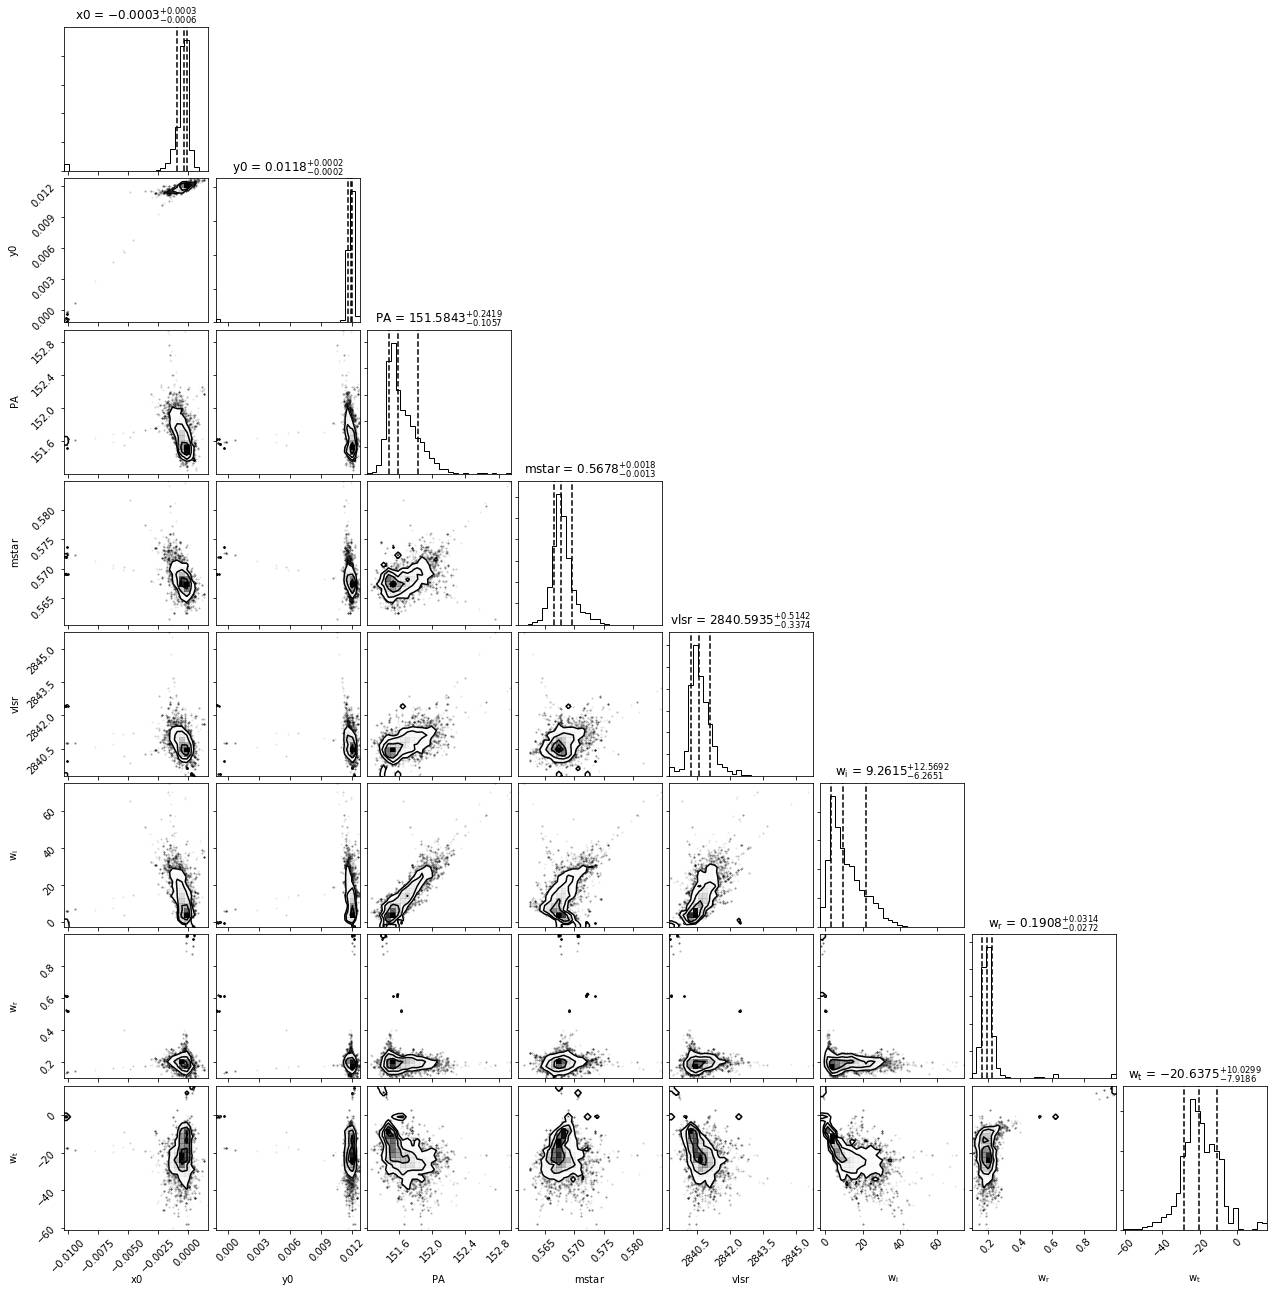

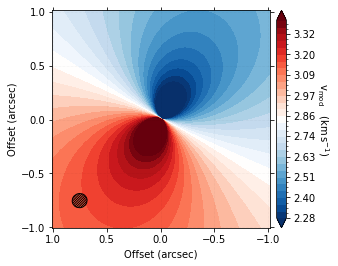

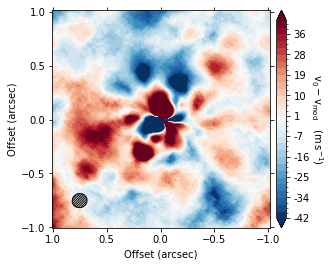

In [5]:
# Fix the source parameters.
params = {}
params['inc'] = 6.8
params['dist'] = 60.1

# Start with simple flat disk approach.
params['x0'] = 0
params['y0'] = 1
params['PA'] = 2
params['mstar'] = 3
params['vlsr'] = 4
p0 = [-6.2e-3, 4.6e-3, 151.0, 0.57, 2.84e3]

# Include the warp properties.
params['w_i'] = 5
params['w_r'] = 6
params['w_t'] = 7
p0 += [0.0, 0.5, 0.0]

# Run this in parallel.
with Pool() as pool:
    _ = cube.fit_map(p0=p0, params=params, nwalkers=128, nburnin=200, nsteps=100,
                     r_min=0.0, pool=pool, niter=1, optimize=False)

Note that this example does not show a warp, but rather to demonstrate how it is implemented.